Using TensorFlow backend.


11460608/11490434 [============================>.] - ETA: 0s(50000, 28, 28) (50000,)


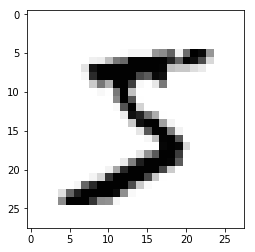

In [1]:
from preprocessed_mnist import load_dataset
X_train, y_train, X_val, y_val, X_test, y_test = load_dataset()
print(X_train.shape, y_train.shape)
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_train[0], cmap="Greys");

In [2]:
X_test.shape
y_test.shape

(10000,)

In [3]:
import tensorflow as tf
tf.__version__

'1.2.1'

In [4]:
import numpy as np
from random import shuffle

ind_list = [i for i in range(X_train.shape[0])]
shuffle(ind_list)
# shuffle...
X_train  = X_train[ind_list, :,:]
y_train = y_train[ind_list,]


out_cases = 10

# make one hot encoding. 1 -> [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
y_train_onehot = np.eye( out_cases )[ y_train ]
y_test_onehot = np.eye( out_cases )[ y_test ]

print( y_train_onehot[:2] )
print( y_train[:2] )

print( y_test_onehot[:2] )
print( y_test[:2] )

# to feed 28x28 -> 784
X_train = X_train.reshape( [-1, 784] )
X_test = X_test.reshape( [-1, 784] )

print( X_train.shape, X_test.shape )

[[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]]
[5 8]
[[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]]
[7 2]
(50000, 784) (10000, 784)


In [5]:
input_size = X_train.shape[1]

X = tf.placeholder( tf.float32, shape=(None, input_size))
Y = tf.placeholder( tf.float32, shape=(None, out_cases))
keepprob = tf.placeholder( tf.float32 )

In [6]:

input_to_hidden = 128
hidden_to_out = 64

w_input = tf.get_variable('w_input', [input_size, input_to_hidden], initializer=tf.contrib.layers.xavier_initializer() )
b_input = tf.get_variable('b_input', [input_to_hidden], initializer=tf.zeros_initializer() )

w_hidden = tf.get_variable('w_hidden', [input_to_hidden, hidden_to_out], initializer=tf.contrib.layers.xavier_initializer() )
b_hidden = tf.get_variable('b_hidden', [hidden_to_out], initializer=tf.zeros_initializer() )

w_hidden2 = tf.get_variable('w_hidden2', [hidden_to_out, hidden_to_out], initializer=tf.contrib.layers.xavier_initializer() )
b_hidden2 = tf.get_variable('b_hidden2', [hidden_to_out], initializer=tf.zeros_initializer() )

w_hidden3 = tf.get_variable('w_hidden3', [hidden_to_out, hidden_to_out], initializer=tf.contrib.layers.xavier_initializer() )
b_hidden3 = tf.get_variable('b_hidden3', [hidden_to_out], initializer=tf.zeros_initializer() )

w_out = tf.get_variable('w_out', [hidden_to_out, out_cases], initializer=tf.contrib.layers.xavier_initializer() )
b_out = tf.get_variable('b_out', [out_cases], initializer=tf.zeros_initializer() )


In [12]:

layer = tf.matmul( X, w_input ) + b_input
#layer = tf.nn.relu( layer )
#layer = selu( layer )
layer = tf.nn.elu( layer )
layer = tf.nn.dropout( layer, keepprob )

layer = tf.matmul( layer, w_hidden ) + b_hidden
#layer = tf.nn.relu( layer )
#layer = selu( layer )
layer = tf.nn.elu( layer )

layer = tf.matmul( layer, w_hidden2 ) + b_hidden2
#layer = tf.nn.relu( layer )
#layer = selu( layer )
layer = tf.nn.elu( layer )
layer = tf.nn.dropout( layer, keepprob )

layer = tf.matmul( layer, w_hidden3 ) + b_hidden3
#layer = tf.nn.relu( layer )
#layer = selu( layer )
layer = tf.nn.elu( layer )

layer_before_activation = tf.matmul( layer, w_out ) + b_out
layer = tf.nn.softmax( layer_before_activation )


epoch 0. train-cost0.36672070622444153 test-cost0.22531193494796753. elapsed:3.066152811050415 sec. tot elapsed:3.066152811050415 sec
epoch 5. train-cost0.1787841022014618 test-cost0.12168481200933456. elapsed:2.9724037647247314 sec. tot elapsed:18.41747212409973 sec
epoch 10. train-cost0.14047834277153015 test-cost0.09818244725465775. elapsed:2.889683485031128 sec. tot elapsed:33.36421489715576 sec
epoch 15. train-cost0.12419779598712921 test-cost0.09004645049571991. elapsed:2.966888189315796 sec. tot elapsed:48.222723722457886 sec
epoch 20. train-cost0.11027409881353378 test-cost0.08721542358398438. elapsed:2.8992087841033936 sec. tot elapsed:63.3569655418396 sec
epoch 25. train-cost0.10622454434633255 test-cost0.08486728370189667. elapsed:2.9678914546966553 sec. tot elapsed:78.17486596107483 sec
epoch 30. train-cost0.0918528288602829 test-cost0.08175749331712723. elapsed:2.918259382247925 sec. tot elapsed:93.03086805343628 sec
epoch 35. train-cost0.08739615231752396 test-cost0.07883

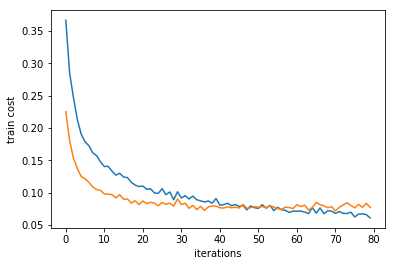

Train Accuracy: 0.99618
Test Accuracy: 0.9812


In [13]:
import time 

batch_size = 50
max_epoch = 80
train_keep_prob = 0.5
test_keep_prob = 1.0

tot_elapsed = 0


#global_step = tf.Variable(0, trainable=False)
#st_learn_rate = 0.001
#learn_rate = tf.train.exponential_decay(st_learn_rate, global_step, X_train.shape[0] / batch_size, 0.96, staircase=True)

cost = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits(labels=Y, logits=layer_before_activation)  )
learn_rate = 0.001
optimizer = tf.train.AdamOptimizer( learn_rate ).minimize( cost )

with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    train_costs = []
    test_costs = []
    step = 0
    for epoch in range(max_epoch):
        
        st = time.time()
        for i in range(0, X_train.shape[0], batch_size):
            X_train_batch = X_train[i:i+batch_size]
            Y_train_batch = y_train_onehot[i: i+batch_size]            
            #ind_list = [i for i in range(X_train_batch.shape[0])]
            #shuffle(ind_list)            
            #X_train_batch  = X_train_batch[ind_list, :]
            #Y_train_batch = Y_train_batch[ind_list,]
            
            #global_step += 1
            sess.run(optimizer, feed_dict={X:X_train_batch, Y:Y_train_batch, keepprob:train_keep_prob})
            
        train_costs.append(sess.run(cost, feed_dict={X:X_train, Y:y_train_onehot, keepprob:train_keep_prob}))
        test_costs.append(sess.run(cost, feed_dict={X:X_test, Y:y_test_onehot, keepprob:test_keep_prob}))
        
        end = time.time()
        
        elapsed = end - st
        tot_elapsed += elapsed
        
        if 5 == epoch % 10 or 0 == epoch % 10:
            print( "epoch {}. train-cost{} test-cost{}. elapsed:{} sec. tot elapsed:{} sec".format( epoch, train_costs[-1], test_costs[-1], elapsed, tot_elapsed ) )
            
    iterations = list(range(max_epoch))
    plt.plot(iterations, train_costs, label='Train')
    plt.plot(iterations, test_costs, label='Test')
    plt.ylabel('train cost')
    plt.xlabel('iterations')
    plt.show()
    
    # Calculate the correct predictions
    predict_op = tf.argmax(layer, 1)
    correct_prediction = tf.equal(predict_op, tf.argmax(Y, 1))

    # Calculate accuracy on the test set
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    train_accuracy = accuracy.eval({X: X_train, Y: y_train_onehot, keepprob:test_keep_prob})
    test_accuracy = accuracy.eval({X: X_test, Y: y_test_onehot, keepprob:test_keep_prob})
    print("Train Accuracy:", train_accuracy)
    print("Test Accuracy:", test_accuracy)